**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
REPO DIRECTORY (FD_REPO): /data/reddylab/Kuei/repo 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/work 
DATA DIRECTORY (FD_DATA): /data/reddylab/Kuei/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/log 
PROJECT REF     (FD_REF): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/references 



**Check: region directory**

In [2]:
txt_fdiry = file.path(FD_RES, "region_coverage_fcc_score")

vec = dir(txt_fdiry)
for (txt in vec){cat(txt, "\n")}

atac_ENCFF333TAT 
atac_ENCFF558BLC 
atac_ENCFF925CYR 
atac_ENCFF948AFM 
dnase_ENCFF185XRG 
dnase_ENCFF274YGF 
fcc_astarr_macs_input_overlap 
fcc_astarr_macs_input_union 


**Check: assay directory**

In [3]:
txt_region = "fcc_astarr_macs_input_union"
txt_fdiry  = file.path(FD_RES, "region_coverage_fcc_score", txt_region)
vec = dir(txt_fdiry)
for (txt in vec) {cat(txt, "\n")}

CRISPRi_FlowFISH_K562_Riley_JinWoo 
CRISPRi_Growth_K562_Gersbach_JinWoo 
MPRA_Lenti_K562_Nadav_Vikram 
MPRA_Tiling_K562_Tewhey_Hannah 
STARR_ATAC_K562_Reddy_KS274 
STARR_ATAC_K562_Reddy_KS91 
STARR_ATAC_K562_Reddy_KSMerge 
STARR_WHG_K562_Reddy_A001 
summary 


**Set global variable**

In [4]:
## init: region folder
vec = c("fcc_astarr_macs_input_overlap", "fcc_astarr_macs_input_union")
names(vec) = vec

VEC_TXT_FOLDER = vec
for (txt in vec) {cat(txt, "\n")}

fcc_astarr_macs_input_overlap 
fcc_astarr_macs_input_union 


In [7]:
TXT_ASSAY = "MPRA_Lenti_K562_Nadav_Vikram"

**Check files**

In [8]:
txt_region = VEC_TXT_FOLDER[1]
txt_assay  = TXT_ASSAY
txt_fdiry  = file.path(FD_RES, "region_coverage_fcc_score", txt_region)
txt_fname  = "region.coverage.score.*.tsv"
txt_fglob  = file.path(txt_fdiry, txt_assay, "summary", txt_fname)

vec = Sys.glob(txt_fglob)
for (txt in vec) {cat(txt, "\n")}

/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/region_coverage_fcc_score/fcc_astarr_macs_input_overlap/MPRA_Lenti_K562_Nadav_Vikram/summary/region.coverage.score.log2fc.tsv 
/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/region_coverage_fcc_score/fcc_astarr_macs_input_overlap/MPRA_Lenti_K562_Nadav_Vikram/summary/region.coverage.score.zscore.tsv 


## Import data

In [9]:
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    
    ### set file directory
    txt_assay = TXT_ASSAY
    txt_fdiry = file.path(FD_RES, "region_coverage_fcc_score", txt_folder, txt_assay, "summary")
    txt_fname = "region.coverage.score.log2fc.tsv"
    txt_fpath = file.path(txt_fdiry, txt_fname)

    ### import table
    dat = read_tsv(txt_fpath, show_col_types = FALSE)
    return(dat)
})  

### assign and label
lst_dat_region_score_log2fc_import = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
fun_display_table(head(dat, 3))

$fcc_astarr_macs_input_overlap
[1] 61478    10

$fcc_astarr_macs_input_union
[1] 68497    10



Chrom,ChromStart,ChromEnd,Region,Mean,Median,AbsMax,Max,Min,Count
chr1,115429,115969,chr1:115429-115969,0.040,0.040,0.040,0.040,0.040,1
chr1,138321,139517,chr1:138321-139517,-0.322,-0.322,-0.543,-0.101,-0.543,2
chr1,267910,268557,chr1:267910-268557,-0.371,-0.371,-0.967,0.225,-0.967,2


In [10]:
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    
    ### set file directory
    txt_assay = TXT_ASSAY
    txt_fdiry = file.path(FD_RES, "region_coverage_fcc_score", txt_folder, txt_assay, "summary")
    txt_fname = "region.coverage.score.zscore.tsv"
    txt_fpath = file.path(txt_fdiry, txt_fname)

    ### import table
    dat = read_tsv(txt_fpath, show_col_types = FALSE)
    return(dat)
})  

### assign and label
lst_dat_region_score_zscore_import = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
fun_display_table(head(dat, 3))

$fcc_astarr_macs_input_overlap
[1] 61478    10

$fcc_astarr_macs_input_union
[1] 68497    10



Chrom,ChromStart,ChromEnd,Region,Mean,Median,AbsMax,Max,Min,Count
chr1,115429,115969,chr1:115429-115969,2.0511008,2.0511008,2.051101,2.051101,2.0511008,1
chr1,138321,139517,chr1:138321-139517,0.7368123,0.7368123,1.539182,1.539182,-0.0655571,2
chr1,267910,268557,chr1:267910-268557,0.5589114,0.5589114,2.722767,2.722767,-1.6049447,2


## Arrange data

In [21]:
idx = "fcc_astarr_macs_input_union"
lst = lst_dat_region_score_log2fc_import
dat = lst[[idx]]
vec = dat$Mean

dat = data.frame(Label = "Log2FC", Score = vec, Zcore = as.vector(scale(vec)))
dat_region_score_log2fc = dat

In [22]:
idx = "fcc_astarr_macs_input_union"
lst = lst_dat_region_score_zscore_import
dat = lst[[idx]]
vec = dat$Mean

dat = data.frame(Label = "Zcore", Score = vec, Zcore = as.vector(scale(vec)))
dat_region_score_zscore = dat

In [25]:
dat = bind_rows(
    dat_region_score_log2fc,
    dat_region_score_zscore
)
dat = dat %>% tidyr::gather(Metric, Value, -Label)

dat_region_score_merge = dat
head(dat)

,Label,Metric,Value
,<chr>,<chr>,<dbl>
1,Log2FC,Score,0.0400
2,Log2FC,Score,-0.3220
3,Log2FC,Score,-0.3710
4,Log2FC,Score,1.1035
5,Log2FC,Score,0.2875
6,Log2FC,Score,0.0915


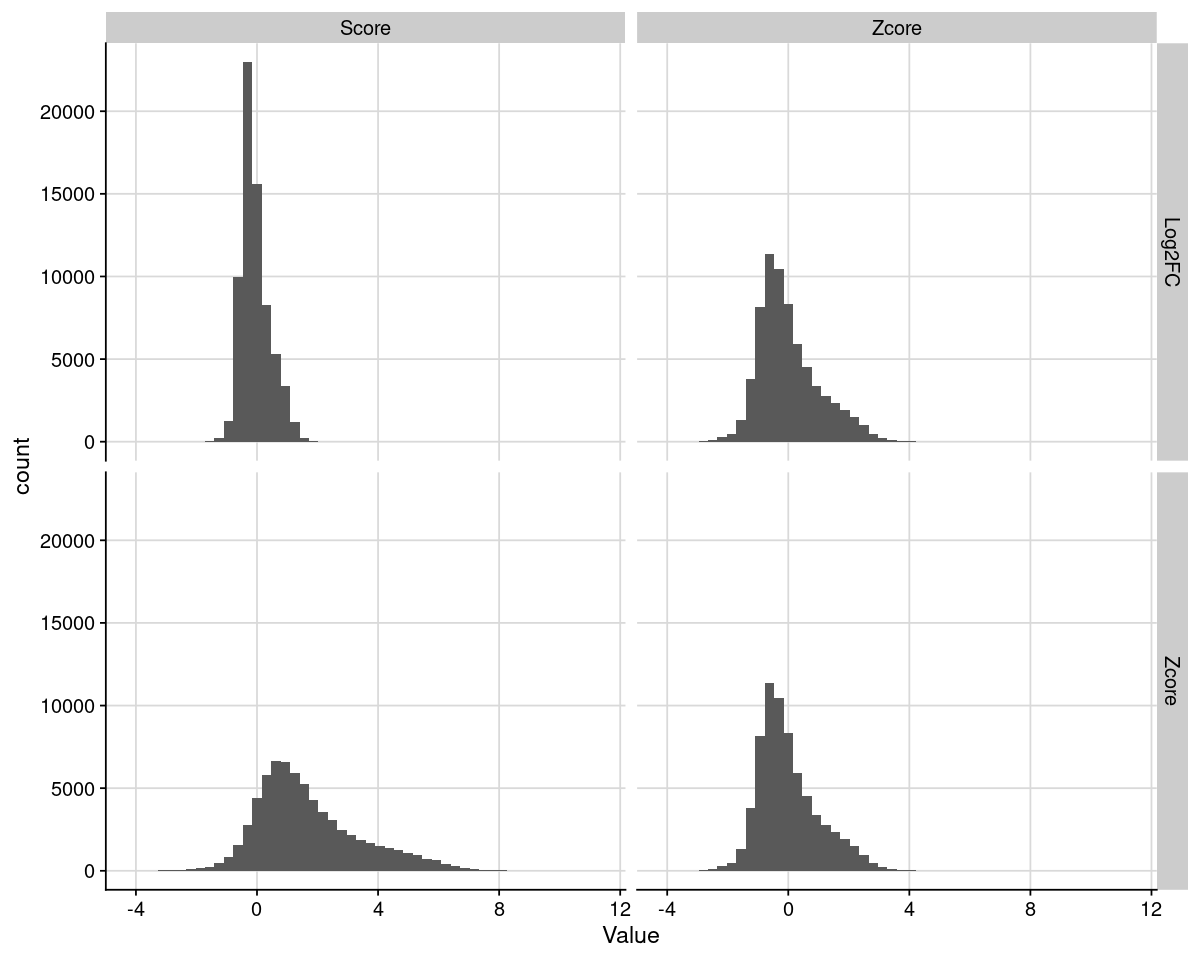

In [31]:
dat = dat_region_score_merge
gpt = ggplot(dat, aes(x=Value)) + 
    geom_histogram(bins = 50) + 
    theme_cowplot() +
    background_grid() +
    facet_grid(Label ~ Metric)
    

options(repr.plot.height = 8, repr.plot.width=10)
print(gpt)

In [19]:
dat = dat_region_score_log2fc
vec = dat$Mean

dat = data.frame(Label = "Log2FC", Score = vec, Zcore = as.vector(scale(vec)))
head(dat)

,Score,Zcore
,<dbl>,<dbl>
1,0.0400,0.2079136
2,-0.3220,-0.5588771
3,-0.3710,-0.6626692
4,1.1035,2.4606260
5,0.2875,0.7321697
6,0.0915,0.3170012


In [20]:
dat = dat_region_score_zscore
vec = dat$Mean

dat = data.frame(Label = "Zcore", Score = vec, Zcore = as.vector(scale(vec)))
head(dat)

,Score,Zcore
,<dbl>,<dbl>
1,2.0511008,0.2079136
2,0.7368123,-0.5588771
3,0.5589114,-0.6626692
4,5.9122769,2.4606260
5,2.9496819,0.7321697
6,2.2380783,0.3170012


**Prepare assay and file names**

In [23]:
vec_txt_assay = c(
    "MPRA_Lenti_K562_Nadav_Vikram"
)
vec = c(
    "region.coverage.score.zscore.tsv"
)
names(vec) = vec_txt_assay
vec_txt_fname = vec

**Check input files**

### Import data

In [25]:
lst = lapply(VEC_TXT_REGION, function(txt_region){
    ### loop through each assay and import table
    lst = lapply(vec_txt_assay, function(txt_assay){
        ### set file glob
        txt_fdiry  = file.path(FD_RES, "region_coverage_fcc_score", txt_region, txt_assay, "summary")
        txt_fname = vec_txt_fname[txt_assay]
        txt_fpath = file.path(txt_fdiry, txt_fname)

        ### import table
        dat = read_tsv(txt_fpath, show_col_types = FALSE)
        dat = dat %>% dplyr::mutate(
            Assay_Folder = fun1(txt_fpath),
            Assay_Group  = fun2(txt_fpath),
            Assay_Label  = fun3(txt_fpath)
        )
        return(dat)
    }) 

    ### combine tables
    dat = bind_rows(lst)
    return(dat)
})  

### assign and label
lst_dat_region_score_lmpra_import = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
fun_display_table(head(dat, 3))

$fcc_astarr_macs_input_overlap
[1] 61478    13

$fcc_astarr_macs_input_union
[1] 68497    13



Chrom,ChromStart,ChromEnd,Region,Mean,Median,AbsMax,Max,Min,Count,Assay_Folder,Assay_Group,Assay_Label
chr1,115429,115969,chr1:115429-115969,2.0511008,2.0511008,2.051101,2.051101,2.0511008,1,MPRA_Lenti_K562_Nadav_Vikram,LMPRA,LMPRA
chr1,138321,139517,chr1:138321-139517,0.7368123,0.7368123,1.539182,1.539182,-0.0655571,2,MPRA_Lenti_K562_Nadav_Vikram,LMPRA,LMPRA
chr1,267910,268557,chr1:267910-268557,0.5589114,0.5589114,2.722767,2.722767,-1.6049447,2,MPRA_Lenti_K562_Nadav_Vikram,LMPRA,LMPRA


**Explore: count**

In [26]:
lst = lst_dat_region_score_lmpra_import
lst = lapply(lst, function(dat){
    res = table(dat$Assay_Group, dnn = "Assay")
    dat = as.data.frame(res)
    return(dat)
})
dat = bind_rows(lst, .id = "Folder")
dat = dat %>% tidyr::spread(Folder, Freq)
fun_display_table(dat)

Assay,fcc_astarr_macs_input_overlap,fcc_astarr_macs_input_union
LMPRA,61478,68497


**Explore: Missing data**

In [27]:
lst = lst_dat_region_score_lmpra_import
lst = lapply(lst, function(dat){
    lst = lapply(dat, function(vec){
        num = sum(is.na(vec))    
        return(num)
    })
    vec = unlist(lst)
    return(vec)
})

dat = bind_rows(lst, .id = "Folder")
fun_display_table(dat)

Folder,Chrom,ChromStart,ChromEnd,Region,Mean,Median,AbsMax,Max,Min,Count,Assay_Folder,Assay_Group,Assay_Label
fcc_astarr_macs_input_overlap,0,0,0,0,0,0,0,0,0,0,0,0,0
fcc_astarr_macs_input_union,0,0,0,0,0,0,0,0,0,0,0,0,0


### Summarize FCC effect sizes

In [28]:
lst = lst_dat_region_score_lmpra_import
lst = lapply(lst, function(dat){
    ### process scores
    dat = dat %>% 
        dplyr::group_by(Assay_Group) %>%
        dplyr::mutate(
            Score = Mean,
            Zcore = as.vector(scale(Mean)),
            Score_Label = "Log2FC scaled by Neg.Ctrl",
            Zcore_Label = "Scale(Log2FC)"
        ) %>%
        dplyr::ungroup()

    ### arrange results
    dat = dat %>% 
        dplyr::select(
            Chrom, ChromStart, ChromEnd, Region, 
            Score, 
            Zcore,
            Score_Label,
            Zcore_Label,
            Assay_Folder,
            Assay_Group,
            Assay_Label
        ) %>%
        dplyr::arrange(Chrom, ChromStart, ChromEnd)
    return(dat)
})  

### assign and label
lst_dat_region_score_lmpra_arrange = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
fun_display_table(head(dat, 3))

$fcc_astarr_macs_input_overlap
[1] 61478    11

$fcc_astarr_macs_input_union
[1] 68497    11



Chrom,ChromStart,ChromEnd,Region,Score,Zcore,Score_Label,Zcore_Label,Assay_Folder,Assay_Group,Assay_Label
chr1,115429,115969,chr1:115429-115969,2.0511008,0.1663499,Log2FC scaled by Neg.Ctrl,Scale(Log2FC),MPRA_Lenti_K562_Nadav_Vikram,LMPRA,LMPRA
chr1,138321,139517,chr1:138321-139517,0.7368123,-0.5919431,Log2FC scaled by Neg.Ctrl,Scale(Log2FC),MPRA_Lenti_K562_Nadav_Vikram,LMPRA,LMPRA
chr1,267910,268557,chr1:267910-268557,0.5589114,-0.6945850,Log2FC scaled by Neg.Ctrl,Scale(Log2FC),MPRA_Lenti_K562_Nadav_Vikram,LMPRA,LMPRA
